<a href="https://colab.research.google.com/github/be1le/machine-learning/blob/basic/%EC%BA%90%EA%B8%80_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 캐글

https://kaggle.com

캐글은 머신러닝 엔지니어가 레벨업 할 수 있는 던전이자, 사냥터입니다. 수많은 공개된 데이터셋과 각 데이터셋 별로 사람들이 분석한 결과들을 모아놓은 플랫폼이죠.

기업 및 단체에서 Prize를 걸고 데이터와 해결 과제를 등록하면, 데이터 사이언티스트들이 이를 해결하기 위해 모델을 개발하고 경쟁하기도 하는 플랫폼입니다.

## Colab에서 Kaggle 데이터셋 다운로드 방법

1. [Kaggle](https://www.kaggle.com) 회원가입
2. Account(계정) 페이지 진입 (https://www.kaggle.com/[사옹자이름]/account)
3. API - Create New API Token 클릭하고 kaggle.json 다운로드
4. 브라우저에서 json 파일을 열어 username 및 key 복사
5. 아래 코드에 자신의 username 및 key를 붙여넣어 환경변수 설정 실행

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] =  # 'username'
os.environ['KAGGLE_KEY'] =  # 'key'

## 광고 데이터셋 다운로드

1. Kaggle에서 원하는 데이터셋을 검색 (예: https://www.kaggle.com/ashydv/advertising-dataset)
2. [Copy API command] 버튼 클릭 (New Notebook 옆에 ... 버튼 클릭)
3. 코드 셀에 붙여넣고 실행! (맨 앞에 "!" 꼭 붙이는거 잊지 마세요!)



In [ ]:
!kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 1.70MB/s]


데이터셋 압축 해제

In [ ]:
!unzip /content/advertising-dataset.zip

Archive:  /content/advertising-dataset.zip
  inflating: advertising.csv         


##  광고 데이터 예측 (Single-variable linear regression)

TV 광고 금액으로 Sales 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np #여기까지는 기본적으로 사용하는거
import pandas as pd
import matplotlib.pyplot as plt #그래프그릴때 사용
import seaborn as sns
from sklearn.model_selection import train_test_split #왼쪽클래스를 사용

### 데이터셋 로드

In [ ]:
df = pd.read_csv('advertising.csv')
df.head(5) #앞에서부터 5줄을 출력해라 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 데이터셋 크기 살펴보기

In [ ]:
print(df.shape)

(200, 4)


### 데이터셋 살짝 살펴보기

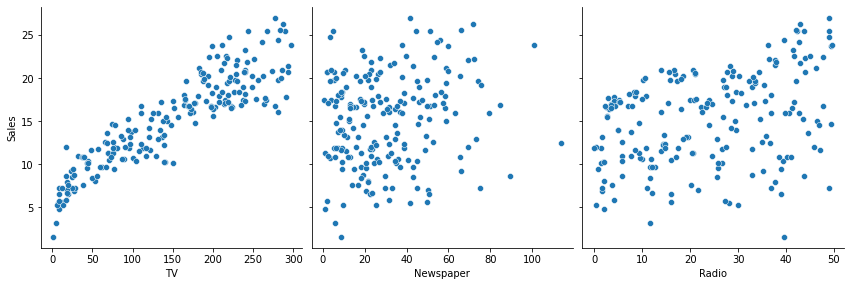

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4) #pairplot데이터프레임을
#통째로넣은후 내가보고싶은variable만뽑아서 관계를보여줘~ 높이는 4!

### 데이터셋 가공

In [ ]:
x_data = np.array(df[['TV']], dtype=np.float32) #인풋은항상x
y_data = np.array(df['Sales'], dtype=np.float32) #아웃풋은 항상 y 

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


In [ ]:
x_data = x_data.reshape((-1, 1)) #-1은 남은수만큼 알아서 변형해라~//1은뒤에가 무조건 1이 되어야한다. 
y_data = y_data.reshape((-1, 1))
#이렇게 reshape을 해야지 keras가 인식을 하기가 편하다. 
print(x_data.shape)
print(y_data.shape)

(200, 1)
(200, 1)


### 데이터셋 분할

학습 데이터 80%
검증 데이터 20%

참고) 강의에서는 편의를 위해 테스트 데이터를 나누지 않았습니다. 실무에서는 꼭 학습/검증/테시트 데이터를 나누는 것 잊지마세요!

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160,) (40,)


### 학습

In [ ]:
model = Sequential([
  Dense(1) #출력이 1이기때문에. 
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit( #학습시킬때는 fit! 입혀보는거다! 
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
5/5 [==============================] - 1s 71ms/step - loss: 5833.3726 - val_loss: 761.3849
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 319.5809 - val_loss: 1034.7961
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 1451.2655 - val_loss: 1417.9568
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 740.4556 - val_loss: 117.6895
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 82.6511 - val_loss: 280.2858
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 332.9115 - val_loss: 373.0184
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 183.7398 - val_loss: 38.4852
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 36.3760 - val_loss: 91.6688
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 101.1033 - val_loss: 75.7784
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 42.7364 - 

### 검증 데이터로 예측하기

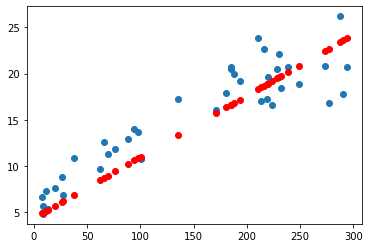

In [ ]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val) #plt.scatter 로점을 다다다닥찍어주세요~
plt.scatter(x_val, y_pred, color='r')
plt.show()#보여주세요 !

## 광고 데이터 예측하기 (Multi-variable linear regression)

TV, Newspaper, Radio 광고 금액으로 Sales 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('advertising.csv')

x_data = np.array(df[['TV', 'Newspaper', 'Radio']], dtype=np.float32) #입력값이 여러가지니까 x 값이 늘어났다. 
y_data = np.array(df['Sales'], dtype=np.float32)

x_data = x_data.reshape((-1, 3)) #뒤에값이 3개니까 3개를보고해야하니까 
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([#모델도똑같고 
  Dense(1)#출력도하나고!
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

(200, 3)
(200, 1)
(160, 3) (40, 3)
(160, 1) (40, 1)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 0s 31ms/step - loss: 564.0863 - val_loss: 187.2815
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 226.5271 - val_loss: 133.9848
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 109.8175 - val_loss: 115.3729
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 80.9627 - val_loss: 64.9165
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 37.0686 - val_loss: 34.3096
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 20.5022 - val_loss: 9.4556
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 9.4553 - val_loss: 10.2852
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 10.6914 - val_loss: 12.2417
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 10.7605 - val_loss: 10.8214
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 7.2912 - val_loss: 10.1295
Epoch 11/100
5/5 

In [ ]:
y_pred = model.predict(x_val)#검증!

print(y_pred.shape)

(40, 1)


## TV 데이터 예측 그래프

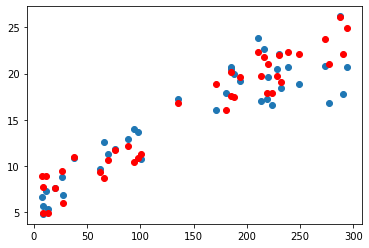

In [ ]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')#예측값은빨간색으로찍어
plt.show()#이문제는 2차원적인 문제가아니라서 선형으로 안보이겠지만 차원x값이3개니까 3차원그래프로보면 선형이 될것이다.

## Newspaper 데이터 예측 그래프

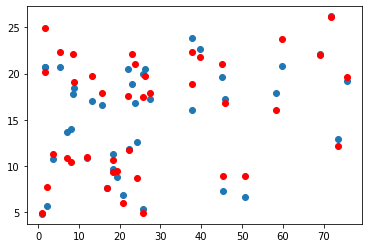

In [ ]:
plt.scatter(x_val[:, 1], y_val)
plt.scatter(x_val[:, 1], y_pred, color='r')
plt.show()

### Radio 데이터 예측 그래프

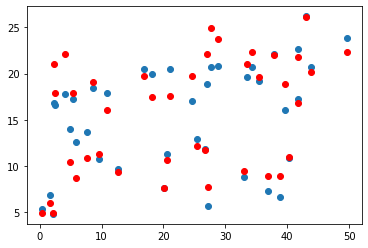

In [ ]:
plt.scatter(x_val[:, 2], y_val)
plt.scatter(x_val[:, 2], y_pred, color='r')
plt.show()

In [ ]:
!kaggle datasets download -d rsadiq/salary
!unzip salary.zip

  0% 0.00/392 [00:00<?, ?B/s]
100% 392/392 [00:00<00:00, 838kB/s]
Archive:  salary.zip
  inflating: Salary.csv              


1.러닝레이트를 바꾸면서 실행하기
2.옵티마이저를 바꾸면서 실험하기
3.손실함수도 loss도 mean_absolute_error로 바꿔서 실험하기 숙제입니다이게!

In [ ]:
df = pd.read_csv('Salary.csv')
df.head(5) #앞에서부터 5줄을 출력해라 

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
print(df.shape)

(35, 2)


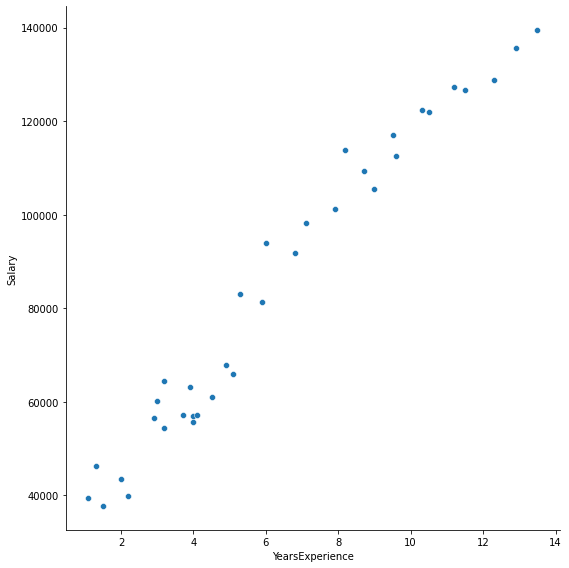

In [ ]:
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], height=8)

In [ ]:
x_data = np.array(df[['YearsExperience']], dtype=np.float32) #인풋은항상x
y_data = np.array(df['Salary'], dtype=np.float32) #아웃풋은 항상 y 

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35,)


In [ ]:
x_data = x_data.reshape((-1, 1)) #-1은 남은수만큼 알아서 변형해라~//1은뒤에가 무조건 1이 되어야한다. 
y_data = y_data.reshape((-1, 1))
#이렇게 reshape을 해야지 keras가 인식을 하기가 편하다. 
print(x_data.shape)
print(y_data.shape)

(35, 1)
(35, 1)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28, 1) (7, 1)
(28, 1) (7, 1)


In [ ]:
model = Sequential([
  Dense(1) #출력이 1이기때문에. 
])

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))

model.fit( #학습시킬때는 fit! 입혀보는거다! 
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8183642624.0000 - val_loss: 269753632.0000
Epoch 2/100
1/1 [==============================] - 0s 94ms/step - loss: 248483296.0000 - val_loss: 184376352.0000
Epoch 3/100
1/1 [==============================] - 0s 87ms/step - loss: 221215744.0000 - val_loss: 185758240.0000
Epoch 4/100
1/1 [==============================] - 0s 94ms/step - loss: 219466272.0000 - val_loss: 183831392.0000
Epoch 5/100
1/1 [==============================] - 0s 118ms/step - loss: 217813872.0000 - val_loss: 182115984.0000
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 216176400.0000 - val_loss: 180407264.0000
Epoch 7/100
1/1 [==============================] - 0s 54ms/step - loss: 214553472.0000 - val_loss: 178716496.0000
Epoch 8/100
1/1 [==============================] - 0s 86ms/step - loss: 212945040.0000 - val_loss: 177042960.0000
Epoch 9/100
1/1 [==============================] - 0s 62ms/step - loss: 211350928.0000 -

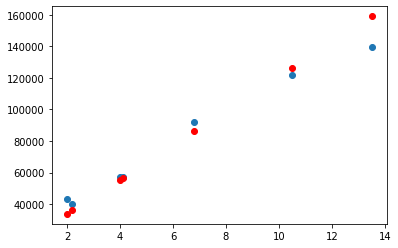

In [ ]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val) #plt.scatter 로점을 다다다닥찍어주세요~
plt.scatter(x_val, y_pred, color='r')
plt.show()#보여주세요 !

In [ ]:
y_pred = model.predict(x_val)#검증!

print(y_pred.shape)

(7, 1)


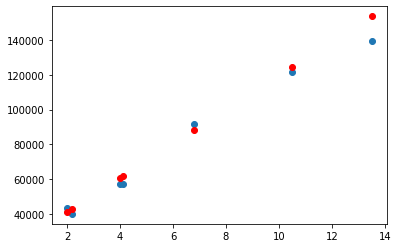

In [ ]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')#예측값은빨간색으로찍어
plt.show()